In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import pandas as pd
from joblib import dump, load

In [2]:
from pymongo import MongoClient
client = MongoClient()
mongo_db = client.train_data
collection = mongo_db.model_data
data = pd.DataFrame(list(collection.find()))
data

,_id,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,616e28170d650c971d91fff4,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,616e28170d650c971d91fff5,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,616e28170d650c971d91fff6,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,616e28170d650c971d91fff7,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,616e28170d650c971d91fff8,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,616e28180d650c971d9318f9,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,616e28180d650c971d9318fa,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,616e28180d650c971d9318fb,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,616e28180d650c971d9318fc,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/model_data_3sec.csv'))

In [4]:
#drop label and filename columns
X = data.drop(['_id','Unnamed: 0','label','filename'], axis=1)
# get label values 
y = data['label']
y.unique()

array(['Rock', 'Folk', 'Experimental', 'Hip-Hop', 'International', 'Pop',
       'Electronic', 'Instrumental'], dtype=object)

In [5]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0.381544,0.249562,1957.407156,2048.485350,3585.029860,0.100943,0.000052,0.000068,112.347147,-8.945985,...,3.019332,3.665317,-9.748421,2.995540,-4.559982,-2.866331,-8.990259,1.595329,-6.731744,4.317326
1,0.484288,0.253424,2766.351306,2542.654962,5738.018893,0.158905,0.000034,-0.000009,117.453835,31.914341,...,-3.049455,2.144493,-9.148898,4.389838,-6.054724,-3.617906,-7.587147,0.172193,-5.444875,1.197923
2,0.425569,0.256628,2908.207536,2703.913526,6252.910907,0.163713,0.000011,-0.000250,117.453835,36.925098,...,-5.784952,3.680824,-10.186584,2.543274,-6.967072,-2.589857,-8.594354,-0.271126,-5.592191,-0.288590
3,0.468948,0.265448,2618.340173,2548.584807,5554.903846,0.139870,-0.000049,-0.000192,123.046875,37.924717,...,-8.235471,1.791170,-8.883386,-0.221089,-7.038162,-2.001146,-9.315182,-3.543423,-5.760088,2.120627
4,0.392290,0.271375,2767.550410,2663.721676,5940.845102,0.146143,-0.000054,-0.000268,117.453835,37.417984,...,2.061754,-0.329844,-7.563095,4.706252,-5.521904,-4.830932,-8.423706,-0.152457,-4.535352,2.383680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,0.457243,0.243057,483.225740,875.708502,703.804462,0.019449,0.000010,-0.000006,135.999178,-278.415741,...,-1.636234,6.133297,4.796370,2.530937,7.792923,14.952423,4.513030,4.309551,9.335838,4.856527
71942,0.447897,0.234766,660.113748,1349.132689,775.692233,0.019035,-0.000303,0.000336,135.999178,-273.169312,...,-3.726220,7.489089,2.066535,1.700049,2.323061,7.850317,1.916095,2.931519,7.093570,5.723800
71943,0.444989,0.230987,631.195340,1317.927939,887.664889,0.014461,0.000217,-0.000002,135.999178,-277.834869,...,-3.057849,6.231783,3.418291,4.423429,6.805921,10.383173,4.368050,4.368290,7.466063,1.732873
71944,0.485998,0.233158,616.469137,1299.877639,730.638146,0.018412,-0.000048,0.000080,135.999178,-284.960388,...,-3.458435,7.796859,3.189467,2.171970,2.082361,6.422930,1.273448,4.322249,9.085366,6.584610


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### with unscaled data

k: 1, Train/Test Score: 1.000/0.388
k: 3, Train/Test Score: 0.640/0.364
k: 5, Train/Test Score: 0.573/0.376
k: 7, Train/Test Score: 0.532/0.378
k: 9, Train/Test Score: 0.503/0.374


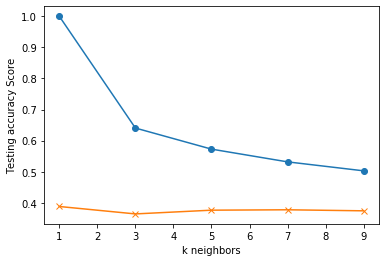

In [7]:
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

### with scaled data

In [8]:

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.847
k: 3, Train/Test Score: 0.912/0.798
k: 5, Train/Test Score: 0.872/0.772
k: 7, Train/Test Score: 0.840/0.748
k: 9, Train/Test Score: 0.812/0.726


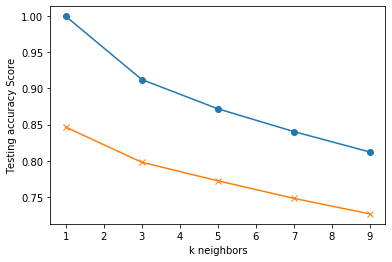

In [9]:
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.798


In [11]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
40975,Hip-Hop,Rock
56578,International,Electronic
63455,Hip-Hop,Hip-Hop
56472,Instrumental,Instrumental
47429,Hip-Hop,Hip-Hop
...,...,...
29578,International,International
23157,Pop,Pop
6158,Instrumental,Instrumental
60060,Rock,Rock


In [12]:
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

   Electronic       0.69      0.84      0.76      2231
 Experimental       0.78      0.81      0.79      2258
         Folk       0.78      0.81      0.80      2278
      Hip-Hop       0.81      0.81      0.81      2234
 Instrumental       0.82      0.79      0.80      2286
International       0.81      0.80      0.80      2250
          Pop       0.86      0.69      0.76      2247
         Rock       0.88      0.84      0.86      2203

     accuracy                           0.80     17987
    macro avg       0.80      0.80      0.80     17987
 weighted avg       0.80      0.80      0.80     17987



In [13]:

dump(knn, 'Model/3_sec_model_KNN.joblib') 

['Model/3_sec_model_KNN.joblib']